# DefocusTrackerAI: Automatic Detection of Defocused Particle Images

In this nootebook, we will explore the automatic detection of defocused particle images using machine learning based object detectors and the SORT (Simple Online Realtime Tracking) tracking algorithm. In particular, how to initiate the python class, process the images and visualize the results.

## Outline:
- [1. Notebook preparation](#1)
  - 1.1 Setup Google Drive (if needed)
  - 1.2 Setup working directory
  - 1.3 Install requirements
- [2. DefocusTrackerAI](#2)
  - [2.1 Initiate DefocusTrackerAI](#2.1)
  - [2.2 Process image set with YOLOv7](#2.2)
  - [2.3 Visualize the detection and tracking results on the image set](#2.3)


<a name="1"></a>

## 1 Notebook preparation

First, let's run the following cells to setup the Google Drive (if needed), the working directory and install the requirements for the DefocusTrackerAI toolbox.

In [2]:
# Setup Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab\ Notebooks/CNN_DPTV/defocustrackerAI_ready2use

/content/drive/MyDrive/Colab Notebooks/CNN_DPTV/defocustrackerAI_ready2use


In [ ]:
pip install -r requirements.txt

<a name="2"></a>

## 2 DefocusTrackerAI

The `DefocusTrackerAI` is a python class that contains the methods to automatically detect defocus particle images and track them in 2D using the SORT algorithm. To start using the toolbox, first we need to import it as shown below: `from my_utils.DefocusTrackerAI import DefocusTrackerAI`.

In [5]:
# Import python class: DefocusTrackerAI
from my_utils.DefocusTrackerAI import DefocusTrackerAI

<a name="2.1"></a>

### 2.1 Initiate DefocusTrackerAI

Once it is imported, we can initiate the `DefocusTrackerAI` providing the directory containing the images to be processed, as shown in the next cell. The processing can be done using the `detect_yolov7` method. Some guidelines follow:  

1. `mytracker` will be an object from the `DefocusTrackerAI` class, which contains its own image set, provided by the image directory, and can call the methos defined in the class, such as `detect_yolov7`.  

2. `detect_yolov7` is an implementation of the object detector YOLOv7 and by default it is initiated with YOLOv7-m model with pre-trained weights on a synthetic dataset containing defocused particle images. As hyper-parameters, it takesm the number of frames that we want to process `N_frames`, the confidence threshold `conf_thres`, the image size `imgsz` and a optional bool type hyper-parameter to enable or disable tracking `enable_tracking`.

3. During processing, a folder named `runs` will be created in the working directory where one can find, within detection and the weights version, a folder with the processed data. It will contain a `.txt` file containing the hyperparameters, a `.csv` file with the detections (fr, id, X, Y, W, H, Cm) and also a folder with `.txt` files containing the detections for each individual frame.

4. If tracking is enabled with `enable_tracking = True`, the `.csv` file containing the tracking data can be found in `runs/tracking`. It uses the same format, however with the `id` corresponding to each individual track.

_**NOTE:** Users can also use one of the other available models in our implementation: YOLOv7-s (lightweight version) and YOLOv7-c (large version) or
provide their own pre-trained weights for one of these models: YOLOv7 -s, -m or -c._

In [6]:
# Directory containing the images to be processed
image_dir = './data-test/Ghost_PBS_mid_Q4_01'
#image_dir = './data-test/Datasets-WTE3'
# Initiate DefocusTrackerAI
mytracker = DefocusTrackerAI(image_dir)

DefocusTrackerAI-1.0.0 🔍 2025-01-28 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Working directory: /content/drive/MyDrive/Colab Notebooks/CNN_DPTV/defocustrackerAI_ready2use


<a name="2.2"></a>

### 2.2 Process images with YOLOv7

Now that we are all set, we can process a few frames for testing and enable tracking with `enable_tracking = True`.

In [7]:
my_detections = mytracker.detect_yolov7(N_frames = 20,
                                        conf_thres = 0.5,
                                        iou_thres = 0.5,
                                        imgsz = 1024,
                                        enable_tracking = True
                                    )

YOLO 🚀 2024-12-16 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-m-dpt summary: 588 layers, 32553166 parameters, 0 gradients, 130.7 GFLOPs


Processed image B00001.tiff: Detections: 16, inference time: 5135 ms. Time remaining: 0:01:37.582000 (h:m:s).
Processed image B00002.tiff: Detections: 17, inference time: 1013 ms. Time remaining: 0:00:55.341000 (h:m:s).
Processed image B00003.tiff: Detections: 17, inference time: 1389 ms. Time remaining: 0:00:42.721000 (h:m:s).
Processed image B00004.tiff: Detections: 18, inference time: 930 ms. Time remaining: 0:00:33.879000 (h:m:s).
Processed image B00005.tiff: Detections: 18, inference time: 786 ms. Time remaining: 0:00:27.768000 (h:m:s).
Processed image B00006.tiff: Detections: 18, inference time: 827 ms. Time remaining: 0:00:23.528000 (h:m:s).
Processed image B00007.tiff: Detections: 18, inference time: 1095 ms. Time remaining: 0:00:20.761000 (h:m:s).
Processed image B00008.tiff: Detections: 18, inference time: 1047 ms. Time remaining: 0:00:18.339000 (h:m:s).
Processed image B00009.tiff: Detections: 18, inference time: 1078 ms. Time remaining: 0:00:16.261000 (h:m:s).
Processed ima

<a name="2.3"></a>

### 2.3 Visualize the detection and tracking results on the image set


Amazing! If you reached this far you were able to process your images using `DefocusTrackerAI`.

Now, to visualize the data, we included the `imageset_viewer` method which takes a `pandas dataframe` (`my_detections`) as input and the number of frames to be showed. In each frame, a bounding box will be drawed if the particle was detected. It will be red if tracking was not enabled, or it will have different colors based on the results from the SORT tracking; the number of track will also be displayed.

_**Note**: If you are not happy with the detection rate perhaps lowering the confidence threshold `conf_thres` will improve the results._

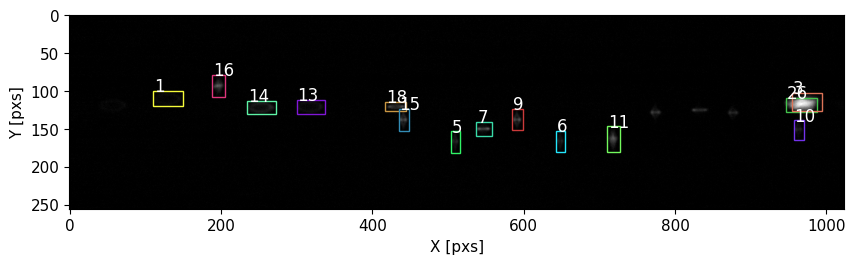

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

IntSlider(value=100, description='Brightness', max=1000, min=1)

In [8]:
%matplotlib inline
mytracker.imageset_viewer(my_detections,
                          n_frames = 20
                          )